# Predicting Student Admissions with Neural Networks in Keras
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

# Task 1
## Loading the data
Read the data file named: "student_data.csv"


In [7]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

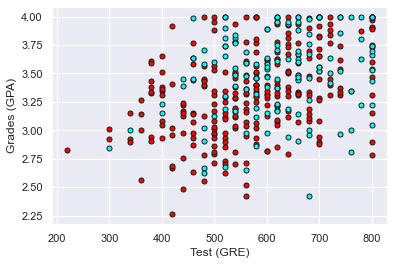

In [3]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'cyan', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

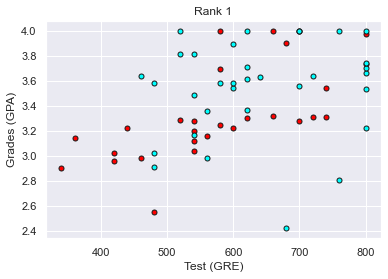

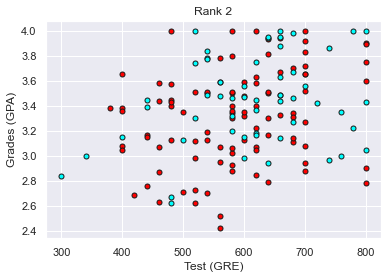

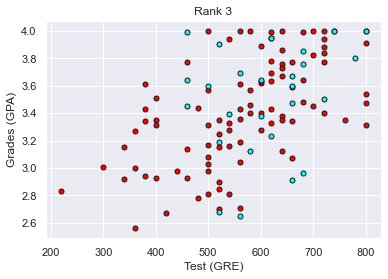

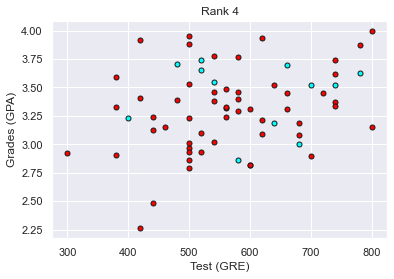

In [4]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## Task-2
## One-hot encoding the rank
For this, please use the `get_dummies` function in pandas.

In [ ]:
pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

In [10]:
data

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
...,...,...,...,...
395,0,620,4.00,2
396,0,560,3.04,3
397,0,460,2.63,2
398,0,700,3.65,2


In [9]:
pd.get_dummies(data['rank'], prefix='rank')

,rank_1,rank_2,rank_3,rank_4
0,0,0,1,0
1,0,0,1,0
2,1,0,0,0
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
395,0,1,0,0
396,0,0,1,0
397,0,1,0,0
398,0,1,0,0


In [6]:
# Make dummy variables for rank
one_hot_data = pd.concat([data, pd.get_dummies(data['rank'], prefix='rank')], axis=1)

# Drop the previous rank column
one_hot_data = one_hot_data.drop('rank', axis=1)

# Print the first 10 rows of our data
one_hot_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1
5,1,760,3.00,0,1,0,0
6,1,560,2.98,1,0,0,0
7,0,400,3.08,0,1,0,0
8,1,540,3.39,0,0,1,0
9,0,700,3.92,0,1,0,0


## Task 3
## Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

Or you can also use `Min Max Scaler`

In [8]:
one_hot_data.describe()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.317500,587.700000,3.389900,0.152500,0.377500,0.302500,0.167500
std,0.466087,115.516536,0.380567,0.359955,0.485369,0.459916,0.373889
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.395000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Copying our data
processed_data = one_hot_data[:]

# Scaling the columns
processed_data['gre'] = processed_data['gre']/800
processed_data['gpa'] = processed_data['gpa']/4.0
processed_data.head(10)

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,0.475,0.9025,0,0,1,0
1,1,0.825,0.9175,0,0,1,0
2,1,1.000,1.0000,1,0,0,0
3,1,0.800,0.7975,0,0,0,1
4,0,0.650,0.7325,0,0,0,1
5,1,0.950,0.7500,0,1,0,0
6,1,0.700,0.7450,1,0,0,0
7,0,0.500,0.7700,0,1,0,0
8,1,0.675,0.8475,0,0,1,0
9,0,0.875,0.9800,0,1,0,0


## Task 4
## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

Also, in Keras, we need to one-hot encode the output. We'll do this with the `to_categorical function`.

In [13]:
import keras
from keras.utils import np_utils
# Separate data and one-hot encode the output
# Note: We're also turning the data into numpy arrays, in order to train the model in Keras

xtrain = np.array(train_data.drop('admit', axis=1))
ytrain = np_utils.to_categorical(train_data['admit'], 2)

xtest = np.array(test_data.drop('admit', axis=1))
ytest = np_utils.to_categorical(test_data['admit'], 2)

print("xtrain:", xtrain[:10], '\n')
print("ytrain:", ytrain[:10])

xtrain: [[0.975  0.9675 0.     0.     0.     1.    ]
 [0.575  0.745  1.     0.     0.     0.    ]
 [0.85   0.9175 0.     1.     0.     0.    ]
 [0.825  0.8725 0.     1.     0.     0.    ]
 [0.625  0.7525 0.     0.     0.     1.    ]
 [1.     1.     1.     0.     0.     0.    ]
 [0.725  0.9425 0.     0.     0.     1.    ]
 [0.775  0.7725 0.     0.     0.     1.    ]
 [0.775  0.9975 0.     0.     1.     0.    ]
 [0.375  0.71   0.     1.     0.     0.    ]] 

ytrain: [[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## Task 5
## Defining the model architecture
Here's where we use Keras to build our neural network.

1. Make a sequential model with 128 nodes on first layer with an activation function of `relu`. 
2. Add a `Dropout` layer with 0.2
3. Add a `Dense` layer with 64 nodes along with `relu` as activation function.
4. Add a `Dropout` layer with 0.1
5. Add a `Dense` layer with 2 nodes with a activation function of softmax.
6. Compile the model with `binary_crossentropy`, optimzer as `adam` and metrics as `accuracy`.

In [17]:
xtrain.shape

(360, 6)

In [25]:
# Imports
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
# from keras.optimizers import SGD
from keras.utils import np_utils

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(6,)))
model.add(Dropout(0.2)) #26
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='sigmoid'))

# Compiling the model
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               896       
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 2)                 130       
                                                                 
Total params: 9,282
Trainable params: 9,282
Non-trainable params: 0
_________________________________________________________________


## Training the model
Train the model by using `fit` function giving inputs as `xtrain`, `ytrain`, `epochs = 200`, `batch_size = 100` and `verbose = True`

In [26]:
# Training the model
model.fit(xtrain, ytrain, epochs=500, batch_size=100, verbose=True)

Epoch 1/500
4/4 [==============================] - 0s 2ms/step - loss: 0.6710 - accuracy: 0.6667
Epoch 2/500
4/4 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6806
Epoch 3/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6332 - accuracy: 0.6806
Epoch 4/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6237 - accuracy: 0.6806
Epoch 5/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6148 - accuracy: 0.6806
Epoch 6/500
4/4 [==============================] - 0s 6ms/step - loss: 0.6130 - accuracy: 0.6806
Epoch 7/500
4/4 [==============================] - 0s 7ms/step - loss: 0.6139 - accuracy: 0.6778
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6077 - accuracy: 0.6833
Epoch 9/500
4/4 [==============================] - 0s 5ms/step - loss: 0.6021 - accuracy: 0.6944
Epoch 10/500
4/4 [==============================] - 0s 8ms/step - loss: 0.5997 - accuracy: 0.6861
Epoch 11/500
4/4 [==========

4/4 [==============================] - 0s 6ms/step - loss: 0.5815 - accuracy: 0.7056
Epoch 85/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.7194
Epoch 86/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5829 - accuracy: 0.7111
Epoch 87/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5728 - accuracy: 0.7167
Epoch 88/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7167
Epoch 89/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.7083
Epoch 90/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5827 - accuracy: 0.7111
Epoch 91/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5769 - accuracy: 0.7056
Epoch 92/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5797 - accuracy: 0.7139
Epoch 93/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5669 - accuracy: 0.7111
Epoch 94/500
4/4 [===============

4/4 [==============================] - 0s 2ms/step - loss: 0.5791 - accuracy: 0.7111
Epoch 167/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5652 - accuracy: 0.7167
Epoch 168/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.7167
Epoch 169/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5712 - accuracy: 0.7250
Epoch 170/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7083
Epoch 171/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5663 - accuracy: 0.7139
Epoch 172/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.7139
Epoch 173/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5727 - accuracy: 0.7139
Epoch 174/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5672 - accuracy: 0.7111
Epoch 175/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5645 - accuracy: 0.7111
Epoch 176/500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.5640 - accuracy: 0.7167
Epoch 249/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5689 - accuracy: 0.7083
Epoch 250/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5584 - accuracy: 0.7139
Epoch 251/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5631 - accuracy: 0.7139
Epoch 252/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5654 - accuracy: 0.7194
Epoch 253/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5710 - accuracy: 0.7222
Epoch 254/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5594 - accuracy: 0.7222
Epoch 255/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5651 - accuracy: 0.7194
Epoch 256/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5712 - accuracy: 0.7278
Epoch 257/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.7167
Epoch 258/500
4/4 [=====

4/4 [==============================] - 0s 4ms/step - loss: 0.5523 - accuracy: 0.7139
Epoch 331/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5606 - accuracy: 0.7083
Epoch 332/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5628 - accuracy: 0.7139
Epoch 333/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5612 - accuracy: 0.7083
Epoch 334/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5649 - accuracy: 0.7139
Epoch 335/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5527 - accuracy: 0.7056
Epoch 336/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5625 - accuracy: 0.7167
Epoch 337/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5658 - accuracy: 0.7167
Epoch 338/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5602 - accuracy: 0.7111
Epoch 339/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5577 - accuracy: 0.7194
Epoch 340/500
4/4 [=====

4/4 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7111
Epoch 413/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7222
Epoch 414/500
4/4 [==============================] - 0s 7ms/step - loss: 0.5595 - accuracy: 0.7111
Epoch 415/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7139
Epoch 416/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.7194
Epoch 417/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5563 - accuracy: 0.7139
Epoch 418/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5600 - accuracy: 0.7194
Epoch 419/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5584 - accuracy: 0.7194
Epoch 420/500
4/4 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.7167
Epoch 421/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5525 - accuracy: 0.7194
Epoch 422/500
4/4 [=====

4/4 [==============================] - 0s 3ms/step - loss: 0.5565 - accuracy: 0.7167
Epoch 495/500
4/4 [==============================] - 0s 6ms/step - loss: 0.5566 - accuracy: 0.7111
Epoch 496/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5517 - accuracy: 0.7222
Epoch 497/500
4/4 [==============================] - 0s 2ms/step - loss: 0.5432 - accuracy: 0.7139
Epoch 498/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5533 - accuracy: 0.7194
Epoch 499/500
4/4 [==============================] - 0s 3ms/step - loss: 0.5522 - accuracy: 0.7278
Epoch 500/500
4/4 [==============================] - 0s 5ms/step - loss: 0.5493 - accuracy: 0.7167


## Scoring the model

Evaluate the model by using `model.evaluate` function on
1. Training Set by giving `xtrain` and `ytrain`
2. Testing Set by giving `xtest` and `ytest`

In [27]:
# Evaluating the model on the training and testing set
train_score = model.evaluate(xtrain, ytrain)
print("\n Training Accuracy:", train_score[1])
test_score = model.evaluate(xtest, ytest)
print("\n Testing Accuracy:", test_score[1])

12/12 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7194

 Training Accuracy: 0.7194444537162781
2/2 [==============================] - 0s 2ms/step - loss: 0.6495 - accuracy: 0.6250

 Testing Accuracy: 0.625


## Challenge: Play with the parameters!
You can see that we made several decisions in our training. For instance, the number of layers, the sizes of the layers, the number of epochs, etc.
It's your turn to play with parameters! Can you improve the accuracy? The following are other suggestions for these parameters. We'll learn the definitions later in the class:
- Activation function: relu and sigmoid
- Loss function: categorical_crossentropy, mean_squared_error
- Optimizer: rmsprop, adam, adadelta